In [4]:
execfile(r'D:\measuring\analysis\scripts\setup_analysis.py')
from analysis.lib.single_click_ent import Espin_DD_analysis as DD
%matplotlib inline

This notebook aims to make a combined plot of LT3 and LT4 data on deocupling for N=1024.
This plot shall exemplify the choice of decoupling time for the two setups.

Required time stampts should be taken from the marked older_than/newer_than regime. Please include a timely taken SSRO calibration.

In [5]:
import matplotlib as mpl
mpl.rc("savefig", **{'transparent':True,'bbox':'tight'})
mpl.rc("xtick",**{'top':True,'direction':'in'})
mpl.rc("ytick",**{'right':True,'direction':'in'})

In [20]:
kws = {'n_datasets' : 5,'subsets' : 7,'return_fit' : True,'do_plot' : True}
basic_f = r'M:\tnw\ns\qt\Diamond\Projects\SingleClickEnt\Data\decoupling'

# LT4 data

Converged with chi squared  0.161937778292
degrees of freedom, dof  19
RMS of residuals (i.e. sqrt(chisq/dof))  0.092320317172
Reduced chisq (i.e. variance of residuals)  0.00852304096274

fitted parameters at minimum, with 68% C.I.:
 0 T            -87.225399 +/-   7.627782

correlation matrix:
               T         
         T  1.000000



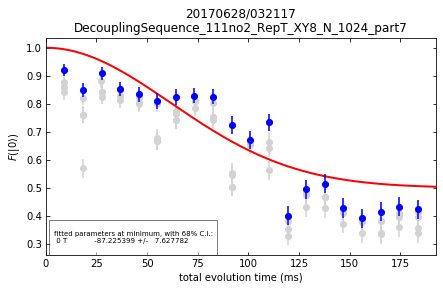

plots are saved in
M:\tnw\ns\qt\Diamond\Projects\SingleClickEnt\Data\decoupling\LT4\20170628\032117_DecouplingSequence_111no2_RepT_XY8_N_1024_part7


In [21]:
reload(DD)
kws['older_than'] = '20170628_090000'; kws['newer_than'] = '20170628_000000';kws['folder']=os.path.join(basic_f,'LT4')
fitresLT4 = DD.analyse_dataset('_'+'1024'+'_part',**kws)

# LT3 DATA

Converged with chi squared  0.122874338831
degrees of freedom, dof  19
RMS of residuals (i.e. sqrt(chisq/dof))  0.0804180978684
Reduced chisq (i.e. variance of residuals)  0.00646707046478

fitted parameters at minimum, with 68% C.I.:
 0 T            125.845292 +/-   8.463584

correlation matrix:
               T         
         T  1.000000



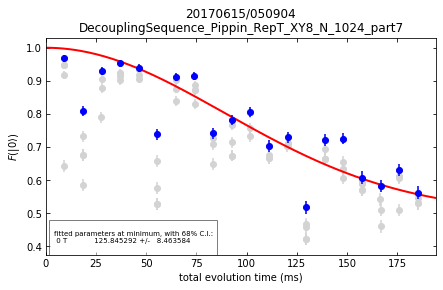

plots are saved in
M:\tnw\ns\qt\Diamond\Projects\SingleClickEnt\Data\decoupling\LT3\20170615\050904_DecouplingSequence_Pippin_RepT_XY8_N_1024_part7


In [23]:
reload(DD)
kws['older_than'] = '20170615_090000'; kws['newer_than'] = '20170614_173530';kws['folder']=os.path.join(basic_f,'LT3')
fitresLT3 = DD.analyse_dataset('_'+'1024'+'_part',**kws)

# Combine data in a double subplot and highlight the relevant decoupling tau

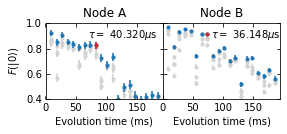

In [52]:
fig,axs = plt.subplots(ncols =2,nrows = 1,sharey=True,figsize = (6*0.7,2*0.7))
plt.sca(axs[0])
plt.ylim([0.4,1])
plt.ylabel(r'$F(|0\rangle)$')
for ax,res,tau,title,make_red in zip(axs,[fitresLT4,fitresLT3],
                                     [[70,0.88,r'$\tau=$ 40.320$\mu$s'],
                                      [80,0.88,r'$\tau=$ 36.148$\mu$s']],
                                     ['A','B'],[8,7]):
    plt.sca(ax)
    plt.title('Node '+title)
    plt.xlabel('Evolution time (ms)')
    plt.errorbar(res['x'],res['y'],res['y_u'],fmt = '.')
    plt.errorbar([res['x'][make_red]],[res['y'][make_red]],[res['y_u'][make_red]],fmt = '.',color= 'tab:red',zorder=100)
    plt.text(tau[0],tau[1],tau[2])
    for x,y, y_u in zip( res['all_x'],res['all_y'],res['all_y_u']):
        ax.errorbar(x,y,y_u,zorder = 0, fmt = '.', color = '#d3d3d3')
        
plt.subplots_adjust(wspace=0, hspace=0.02)
plt.savefig(os.path.join(basic_f,'dyndecoupling.pdf'),format='pdf')